<a href="https://colab.research.google.com/github/nathalygarces/parcial1./blob/main/Ejercico2_2_parcial1(Nathaly%20Garces).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PUNTO 2.2 PARCIAL 1.

In [18]:
#importar librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

#periodos y frecuencias de las señales
T1 = np.pi/2
T2 = 2*np.pi/5
T3 = np.pi/5
T = 2*np.pi #periodo señal cuasiperiódica

F1 = 1/T1
F2 = 1/T2
F3 = 1/T3

#definir frecuencia de muestreo Fs >= 2 Fmax
Fs = 10*max(F1,F2,F3)
tv = np.arange(0,2*T,1/Fs) #vector de tiempo según Fs

#señal
x = 7*np.sin(4*tv - np.pi/2) - 2*np.cos(5*tv) + 2*np.cos(10*tv)


In [19]:
def my_ceropend(x,xhmax=5,xhmin=-5):
  #cálculo de pendiente y cero
  m = (xhmax-xhmin)/(x.max()-x.min())#cálculo pendiente
  b = xhmin - m*x.min() #cálculo cero
  xh = m*x+b #señal con cero y pendiente
  return xh

In [20]:
#señal cero y pendiente a -5 a 5 v
xhmax = 5
xhmin = -5
xh = my_ceropend(x,xhmax=xhmax,xhmin=xhmin).reshape(-1,1)

In [21]:
#cuantizar
nbits = 3 #número bits
Ne = 2**nbits #cantidad de estados
ve = np.linspace(xhmin,xhmax,Ne).reshape(-1,1)#vector de estados
#asegurar vector columna

xq = np.zeros(len(xh)) #señal cuantizada
for i in range(len(xh)): #recorrer señal cero y pendiente
    xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados

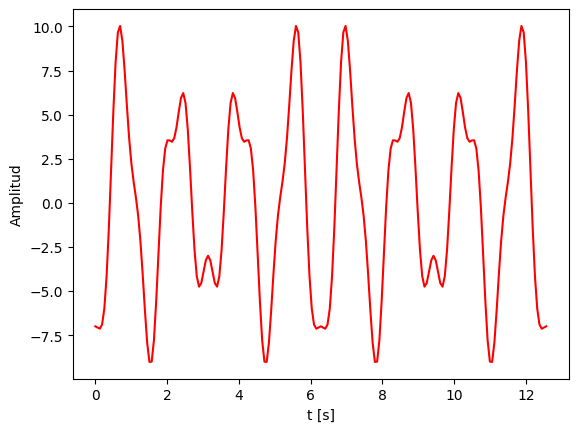

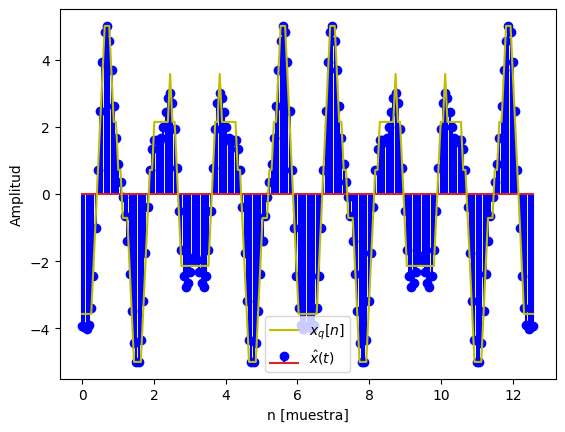

In [22]:
#gráficas de señales
plt.plot(tv,x,'r',label='$x(t)$')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.show()

plt.stem(tv,xh,'b',label='$\hat{x}(t)$')
plt.plot(tv,xq,'y',label='$x_{q}[n]$')
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()